In [1]:
import pandas as pd
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv(r"C:\Users\AB92922\Downloads\news.csv", index_col=None)
dataset = df.drop("Unnamed: 0", axis=1)

In [3]:
# Split dataset into features and target
y = dataset["label"]
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], y, test_size=0.33, random_state=42)

In [4]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [5]:
# Text preprocessing with HashingVectorizer
hashing_vectorizer = HashingVectorizer(stop_words='english', n_features=2**20, dtype=np.float32)
hashing_train = hashing_vectorizer.fit_transform(X_train)
hashing_test = hashing_vectorizer.transform(X_test)

In [6]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier  # Still use GradientBoosting for SGB
from sklearn.metrics import classification_report, accuracy_score


# Stochastic Gradient Boosting Classifier
sgb = GradientBoostingClassifier(random_state=42, subsample=0.8)  # Initialize with subsample for SGB

# Train the model
sgb.fit(hashing_train.astype('float32'), y_train_encoded)

# Make predictions
y_pred_sgb = sgb.predict(hashing_test.astype('float32'))

# Decode the predicted labels back to original form
y_pred_sgb_decoded = label_encoder.inverse_transform(y_pred_sgb)

# Evaluate the model
print("Classification Report for Stochastic Gradient Boosting Classifier:")
print(classification_report(y_test, y_pred_sgb_decoded))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred_sgb_decoded)
print(f"Stochastic Gradient Boosting Accuracy: {accuracy:.4f}")

Classification Report for Stochastic Gradient Boosting Classifier:
              precision    recall  f1-score   support

        FAKE       0.88      0.90      0.89      1071
        REAL       0.90      0.87      0.88      1020

    accuracy                           0.89      2091
   macro avg       0.89      0.89      0.89      2091
weighted avg       0.89      0.89      0.89      2091

Stochastic Gradient Boosting Accuracy: 0.8890


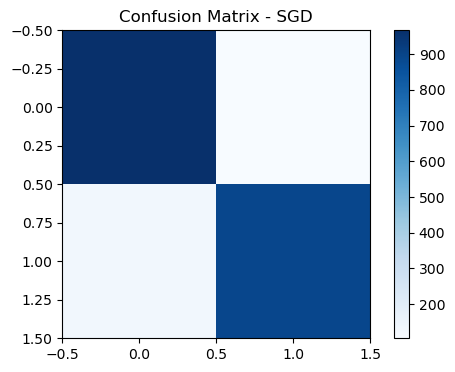

In [7]:
# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred_sgb_decoded)
plt.figure(figsize=(6, 4))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - SGD')
plt.colorbar()
plt.show()

In [8]:
# Make predictions using the trained Logistic Regression model
y_pred_sgd = sgd.predict(hashing_test)

# Display first 10 predictions
print("First 10 predictions:", y_pred_sgd[:10])

# Display corresponding true labels for comparison
print("True labels for the first 10 samples:", y_test[:10].values)


NameError: name 'sgd' is not defined